In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# load Dataset
df=pd.read_csv('Kaagle_Upload.csv') # Read the data from a csv

C:\Users\User\AppData\Local\Temp\ipykernel_3968\3735913948.py:2: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Kaagle_Upload.csv') # Read the data from a csv


In [4]:
# display 10 row of data
df.head(10)

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201506E098780,2,1,0,9,0,5,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
7,201506E098792,2,9,0,4,0,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,201506E098804,1,9,0,14,0,1,0,0,0,...,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0
9,201506E098826,1,9,0,4,0,0,0,0,0,...,5.0,3.0,0.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0


In [5]:
# displays all data features in dataset
df.dtypes

accident_index                         object
vehicle_reference                       int64
vehicle_type                            int64
towing_and_articulation                 int64
vehicle_manoeuvre                       int64
                                       ...   
bus_or_coach_passenger                float64
pedestrian_road_maintenance_worker    float64
casualty_type                         float64
casualty_home_area_type               float64
casualty_imd_decile                   float64
Length: 70, dtype: object

In [6]:
# display overview of the structure of the data frame and data type associated in the column
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-nu

In [7]:
# display the number of data obtained (columns,row)
print("Dataset size:\n")
print('Number of rows:',df.shape[0])
print('Number of columns:',df.shape[1])

Dataset size:

Number of rows: 285331
Number of columns: 70


In [8]:
# checking for duplicated
sum(df.duplicated())

0

In [9]:
# Checking for missing value
display(df.isna().sum())

accident_index                            0
vehicle_reference                         0
vehicle_type                              0
towing_and_articulation                   0
vehicle_manoeuvre                         0
                                      ...  
bus_or_coach_passenger                99259
pedestrian_road_maintenance_worker    99259
casualty_type                         99259
casualty_home_area_type               99259
casualty_imd_decile                   99259
Length: 70, dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

accident_index                        0
vehicle_reference                     0
vehicle_type                          0
towing_and_articulation               0
vehicle_manoeuvre                     0
                                     ..
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
Length: 70, dtype: int64

In [12]:
value_mapping_vechicle = {1: 'Pedal cycle', 2: 'Motorcycle 50cc and under', 3: 'Motorcycle 125cc and under', 4: 'Motorcycle over 125cc and up to 500cc', 5: 'Motorcycle over 500cc',
                  8: 'Taxi/Private hire car', 9: 'Car', 10: 'Minibus (8 - 16 passenger seats)', 11: 'Bus or coach (17 or more pass seats)', 16: 'Ridden horse',17: 'Agricultural vehicle',
                  18:'Tram',19:'Van / Goods 3.5 tonnes mgw or under',20:'Goods over 3.5t. and under 7.5t',21:'Goods 7.5 tonnes mgw and over',22:'Mobility scooter',23:'Electric motorcycle',90:'Other vehicle',
                  97:'Motorcycle - unknown cc', 98:'Goods vehicle - unknown weight', -1: 'Data missing or out of range'}

df['vehicle_type'] = df['vehicle_type'].replace(value_mapping_vechicle)

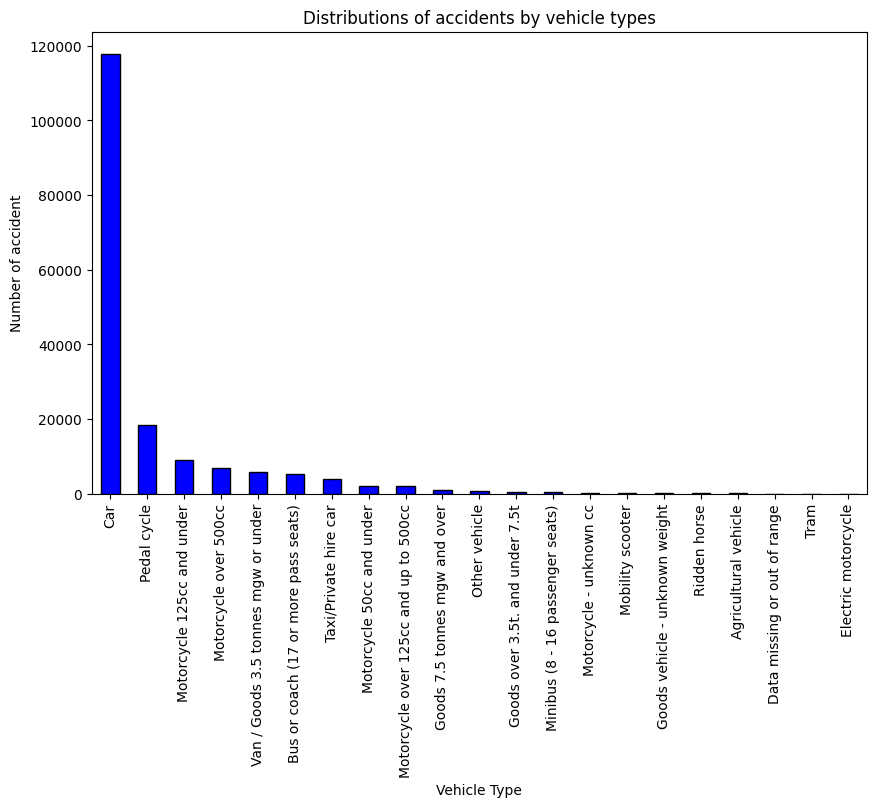

In [13]:
# Creating a histogram to visualize distributions of accidents by vehicle types
plt.figure(figsize=(10, 6))
# plt.hist(df['vehicle_type'], edgecolor='black')
df['vehicle_type'].value_counts().plot(kind='bar', color='blue', edgecolor='black')

plt.xlabel('Vehicle Type')
plt.ylabel('Number of accident')
plt.title('Distributions of accidents by vehicle types')


# plt.title('Distributions of accidents by vehicle types')
# plt.xlabel('Vehicle types')
# plt.ylabel('Number of accident')
plt.show()

In [14]:
value_mapping_whether = {1: 'Fine no high winds', 2: 'Raining no high winds', 3: 'Snowing no high winds', 4: 'Fine + high winds', 5: 'Raining + high winds',
                  6: 'Snowing + high winds', 7: 'Fog or mist', 8: 'Other', 9: 'Unknown',-1: 'out of range'}

df['weather_conditions'] = df['weather_conditions'].replace(value_mapping_whether)

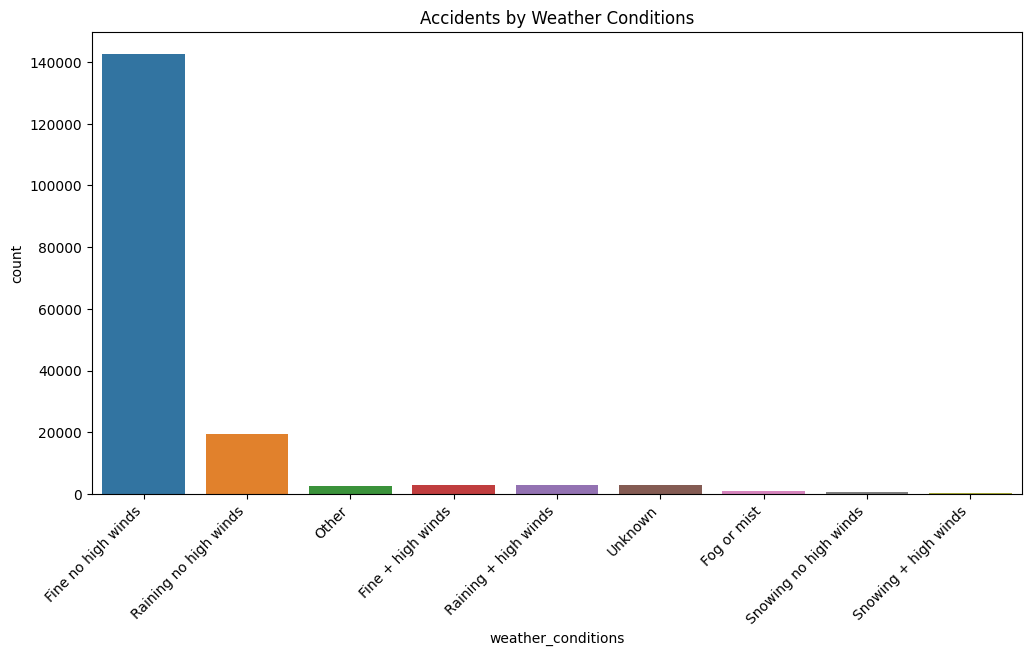

In [15]:
# Countplot for accidents by weather conditions
plt.figure(figsize=(12, 6))
sns.countplot(x='weather_conditions', data=df)
plt.title('Accidents by Weather Conditions')
plt.xticks(rotation=45, ha='right')
plt.show()

Accident Severity by Location Type:


In [16]:
# Define the mapping of old values to new values
value_mapping1 = {1: 'Urban', 2: 'Rural', 3: 'Unallocated'}
value_mapping2 = {1: 'Fatal', 2: 'Serious', 3: 'Slight'}

# Replace values in the 'Attribute' column
df['urban_or_rural_area'] = df['urban_or_rural_area'].replace(value_mapping1)
df['accident_severity'] = df['accident_severity'].replace(value_mapping2)

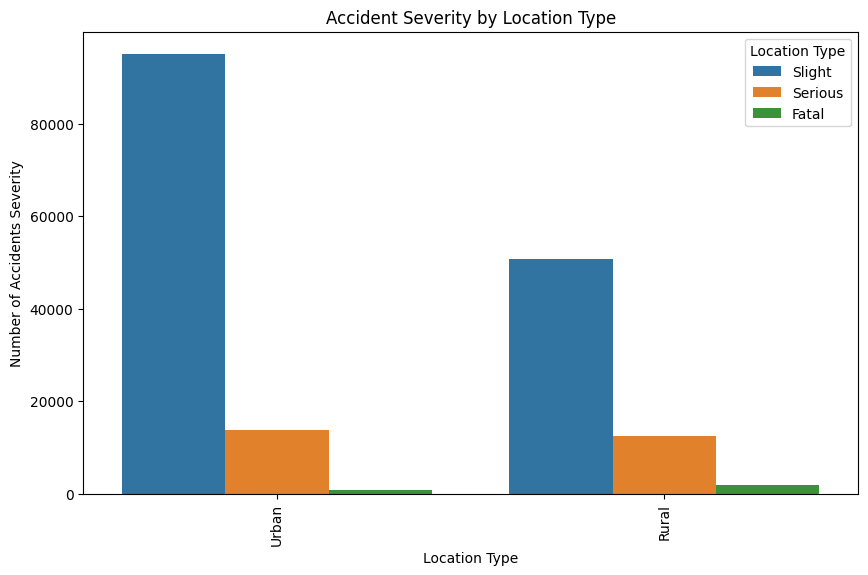

In [17]:
# Assuming the dataset has 'Accident Severity' and 'Location Type' columns
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='urban_or_rural_area', hue='accident_severity')
plt.title('Accident Severity by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Accidents Severity')
plt.xticks(rotation=90)
plt.legend(title='Location Type')
plt.show()

Trend of Accidents Over Time:


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/03/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/03/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/03/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\p

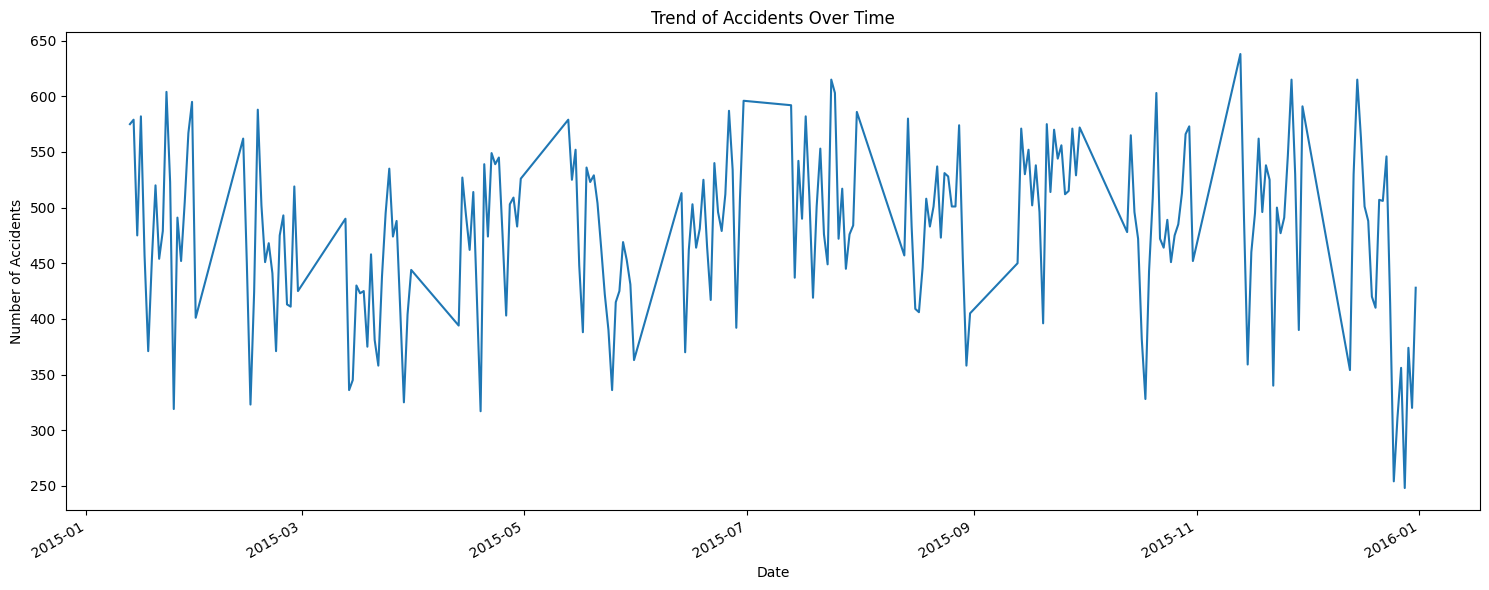

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
accidents_over_time = df['date'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(15, 6))
accidents_over_time.plot()
plt.title('Trend of Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.tight_layout()

# Display the plot
plt.show()

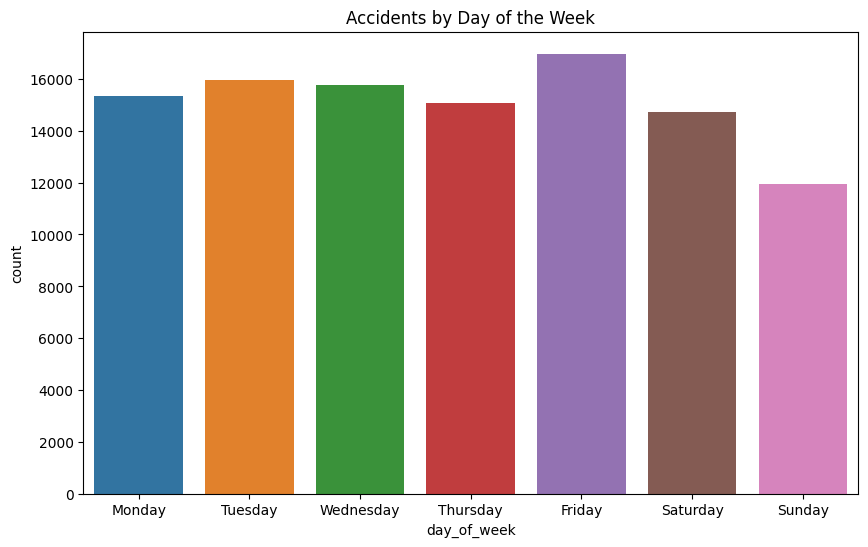

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Countplot for accidents by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Accidents by Day of the Week')
plt.show()

<Figure size 1200x600 with 0 Axes>

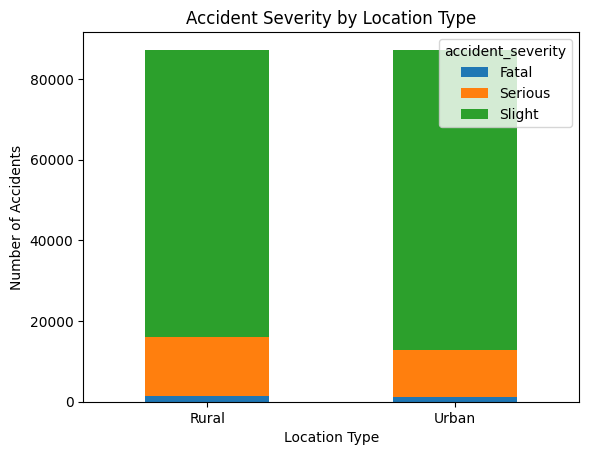

In [20]:
# Categorizing locations as 'Urban' or 'Rural' based on the median of longitude values (as a proxy)
median_longitude = df['longitude'].median()
df['location_type'] = df['longitude'].apply(lambda x: 'Urban' if x > median_longitude else 'Rural')

# Grouping data by location type and accident severity
severity_location_data = df.groupby(['location_type', 'accident_severity']).size().unstack()

# Plotting Accident Severity by Location Type
plt.figure(figsize=(12, 6))
severity_location_data.plot(kind='bar', stacked=True)
plt.title('Accident Severity by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.show()


Distribution of Casualty Age Band

In [21]:
value_mapping_age = {-1:'out of range', 1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4:'16 - 20', 5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}

df['age_band_of_casualty'] = df['age_band_of_casualty'].replace(value_mapping_age)

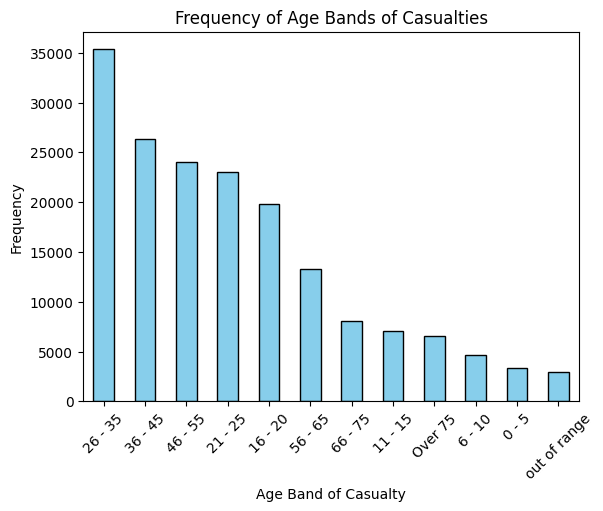

In [22]:
# Count the frequency of each unique value in the 'age_band_of_casualty' column
value_counts = df['age_band_of_casualty'].value_counts()

# Plot the bar graph
value_counts.plot(kind='bar', rot=45, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age Band of Casualty')
plt.ylabel('Frequency')
plt.title('Frequency of Age Bands of Casualties')

# Show the plot
plt.show()


In [23]:
df = df.drop('accident_index', axis=1)

# **Feature Selection**

In [24]:
# Specify the attributes you want to keep
selected_attributes = ['junction_location', 'urban_or_rural_area', 'road_surface_conditions',
                        'weather_conditions', 'light_conditions', 'vehicle_manoeuvre',
                        'skidding_and_overturning', 'journey_purpose_of_driver', 'sex_of_driver',
                        'age_band_of_driver', 'driver_imd_decile', 'vehicle_type',
                        'engine_capacity_(cc)', 'age_of_vehicle', 'propulsion_code',
                        'day_of_week', 'time']

# Create a new DataFrame with the selected attributes
df1 = df[selected_attributes].copy()

In [25]:
numerical_columns = df1.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df1.select_dtypes(include=['object']).columns

In [26]:
X_numerical = df1[numerical_columns]
X_categorical = pd.get_dummies(df1[categorical_columns], drop_first=True)

In [27]:
# Normalize numerical features using StandardScaler
scaler = StandardScaler()
X_numerical_normalized = scaler.fit_transform(X_numerical)

# Create a DataFrame for the normalized numerical features
df_numerical_normalized = pd.DataFrame(X_numerical_normalized, columns=numerical_columns)

In [28]:
# Corrected line to concatenate numerical and one-hot encoded categorical columns
X = pd.concat([df_numerical_normalized, X_categorical], axis=1)

In [29]:
# Display the first few rows of the normalized DataFrame
print(X.head())

   junction_location  road_surface_conditions  light_conditions  \
0           1.604458                -0.539667         -0.582700   
1          -0.811277                -0.539667         -0.582700   
2           0.698558                -0.539667         -0.582700   
3          -0.207343                -0.539667          3.003223   
4          -0.509310                -0.539667         -0.582700   

   vehicle_manoeuvre  skidding_and_overturning  journey_purpose_of_driver  \
0           0.759243                  -0.30975                   0.590642   
1          -1.579323                  -0.30975                  -1.931226   
2          -0.744121                  -0.30975                   0.590642   
3          -1.579323                  -0.30975                  -1.931226   
4           0.091081                  -0.30975                   0.590642   

   sex_of_driver  age_band_of_driver  driver_imd_decile  engine_capacity_(cc)  \
0       -0.67985            0.669767                0

In [30]:
y1 = df['accident_severity']
y2 = df['number_of_casualties']

In [31]:
# Assuming X_numerical and y1 are DataFrames
X_numerical.reset_index(drop=True, inplace=True)
y1.reset_index(drop=True, inplace=True)
y2.reset_index(drop=True, inplace=True)

# Now, perform the train-test split
X_train, X_test, y1_train, y1_test = train_test_split(X_numerical, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X_numerical, y2, test_size=0.2, random_state=42)


In [32]:
model1 = RandomForestClassifier()
rfe1 = RFE(model1, n_features_to_select=10)
rfe1 = rfe1.fit(X_train, y1_train)

selected_features1 = X_train.columns[rfe1.support_]

# Print the selected features for target 1
print("Selected Features for Target 1:")
print(selected_features1)

Selected Features for Target 1:
Index(['junction_location', 'road_surface_conditions', 'light_conditions',
       'vehicle_manoeuvre', 'skidding_and_overturning',
       'journey_purpose_of_driver', 'age_band_of_driver',
       'engine_capacity_(cc)', 'age_of_vehicle', 'propulsion_code'],
      dtype='object')


In [33]:
model2 = RandomForestClassifier()
rfe2 = RFE(model2, n_features_to_select=10)
rfe2 = rfe2.fit(X_train, y2_train)

selected_features2 = X_train.columns[rfe2.support_]

# Print the selected features for target 1
print("Selected Features for Target 2:")
print(selected_features2)

Selected Features for Target 2:
Index(['junction_location', 'road_surface_conditions', 'light_conditions',
       'vehicle_manoeuvre', 'skidding_and_overturning',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_band_of_driver',
       'engine_capacity_(cc)', 'age_of_vehicle'],
      dtype='object')


# **Predict a model**

# **Split Dataset**

In [34]:
selected_attributes_severity = ['junction_location', 'road_surface_conditions', 'light_conditions',
                                'vehicle_manoeuvre', 'skidding_and_overturning','journey_purpose_of_driver',
                                'age_band_of_driver','engine_capacity_(cc)', 'age_of_vehicle', 'propulsion_code']

df_severity = df[selected_attributes_severity].copy()

selected_attributes_casualties = ['junction_location', 'road_surface_conditions', 'light_conditions',
                                'vehicle_manoeuvre', 'skidding_and_overturning','journey_purpose_of_driver',
                                'sex_of_driver', 'age_band_of_driver','engine_capacity_(cc)', 'age_of_vehicle']

df_casualties = df[selected_attributes_casualties].copy()

In [35]:
X_severity = df_severity
X_casualties = df_casualties

y_severity = df['accident_severity']
y_casualties = df['number_of_casualties']

In [36]:
value_mapping_casualty = {1: 'Low', 2: 'Low', 3: 'Low', 4: 'Low', 5: 'Low', 6:'Low', 7:'Low',
                          8:'Medium' ,9:'Medium', 10:'Medium', 11:'Medium', 12:'Medium', 13:'Medium', 14:'Medium', 16:'Medium',
                          17:'High',21:'High',24:'High',34:'High',35:'High',36:'High',38:'High'}

y_casualties = y_casualties.replace(value_mapping_casualty)

In [37]:
# split data
X_train_severity, X_test_severity, y_train_severity, y_test_severity = train_test_split(X_severity, y_severity, test_size=0.4, random_state=42)
X_train_casualties, X_test_casualties, y_train_casualties, y_test_casualties = train_test_split(X_casualties, y_casualties, test_size=0.4, random_state=42)

In [38]:
print(X_train_severity.shape)
print(X_test_severity.shape)

print(X_train_casualties.shape)
print(X_test_casualties.shape)

(104722, 10)
(69816, 10)
(104722, 10)
(69816, 10)


In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_severity_normalized = scaler.fit_transform(X_train_severity)
X_test_severity_normalized = scaler.transform(X_test_severity)

X_train_casualties_normalized = scaler.fit_transform(X_train_casualties)
X_test_casualties_normalized = scaler.transform(X_test_casualties)

In [40]:
# Apply random undersampling to the majority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_severity, y_train_severity = smote.fit_resample(X_train_severity, y_train_severity)

X_train_casualties, y_train_casualties = smote.fit_resample(X_train_casualties, y_train_casualties)

In [41]:
print(X_train_severity.columns)

Index(['junction_location', 'road_surface_conditions', 'light_conditions',
       'vehicle_manoeuvre', 'skidding_and_overturning',
       'journey_purpose_of_driver', 'age_band_of_driver',
       'engine_capacity_(cc)', 'age_of_vehicle', 'propulsion_code'],
      dtype='object')


**Plot graph to check data balancing**

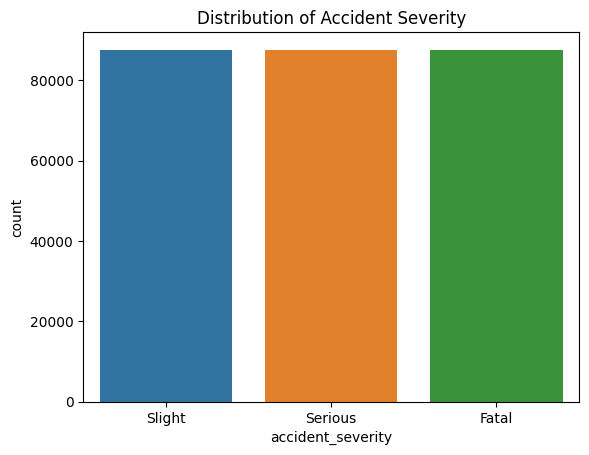

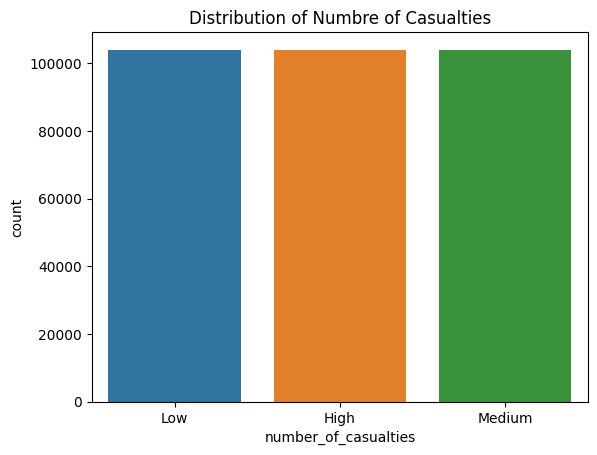

In [42]:
y_train_severity_df = pd.DataFrame({'accident_severity': y_train_severity})

# Plot the count distribution
sns.countplot(x='accident_severity', data=y_train_severity_df)
plt.title('Distribution of Accident Severity')
plt.show()

y_train_casualties_df = pd.DataFrame({'number_of_casualties': y_train_casualties})

# Plot the count distribution
sns.countplot(x='number_of_casualties', data=y_train_casualties_df)
plt.title('Distribution of Numbre of Casualties')
plt.show()


**Descriptive Statistics**

In [43]:
class_distribution1 = y_train_severity_df['accident_severity'].value_counts()
print(class_distribution1)

class_distribution2 = y_train_casualties_df['number_of_casualties'].value_counts()
print(class_distribution2)

Slight     87650
Serious    87650
Fatal      87650
Name: accident_severity, dtype: int64
Low       104062
High      104062
Medium    104062
Name: number_of_casualties, dtype: int64


# # **Accident Severity**

# # **Random Forest**

In [44]:
# For accident severity prediction (train model)
model_severity = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# # Define the number of folds for cross-validation
# num_folds = 5  # You can adjust this based on your preference

# # StratifiedKFold is useful for maintaining class distribution in each fold
# kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Perform cross-validation and evaluate the model
# cross_val_results = cross_val_score(model_severity, X_train_severity, y_train_severity, cv=kf, scoring='accuracy')

# # Display the cross-validation results
# print("Cross-Validation Results:", cross_val_results)
# print("Mean Accuracy:", cross_val_results.mean())

In [46]:
# test model
model_severity.fit(X_train_severity, y_train_severity)
predictions_severity = model_severity.predict(X_test_severity)

In [47]:
# Evaluate using classification metrics
print("Accuracy for accident severity:", accuracy_score(y_test_severity, predictions_severity))
print("Precision for accident severity:", precision_score(y_test_severity, predictions_severity, average='weighted'))
print("Recall for accident severity:", recall_score(y_test_severity, predictions_severity, average='weighted'))
print("F1 Score for accident severity:", f1_score(y_test_severity, predictions_severity, average='weighted'))

print("Confusion Matrix:")
print(confusion_matrix(y_test_severity, predictions_severity))

Accuracy for accident severity: 0.7059699782284863
Precision for accident severity: 0.7810203954722075
Recall for accident severity: 0.7059699782284863
F1 Score for accident severity: 0.7370118548191191
Confusion Matrix:
[[  374   217   435]
 [  771  4342  5448]
 [ 2896 10761 44572]]


# # **Logistic Regression**

In [48]:
# Train model
model_lr_severity = LogisticRegression(random_state=42)
model_lr_severity.fit(X_train_severity, y_train_severity)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [49]:
# test model
predictions_lr_severity = model_lr_severity.predict(X_test_severity)

In [50]:
accuracy_lr_severity = accuracy_score(y_test_severity, predictions_lr_severity)
precision_lr_severity = precision_score(y_test_severity, predictions_lr_severity, average='weighted')
recall_lr_severity = recall_score(y_test_severity, predictions_lr_severity, average='weighted')
f1_lr_severity = f1_score(y_test_severity, predictions_lr_severity, average='weighted')


print("Accuracy for accident severity:", accuracy_lr_severity)
print(f'Precision for accident severity: {precision_lr_severity}')
print(f'Recall for accident severity: {recall_lr_severity}')
print(f'F1 Score for accident severity: {f1_lr_severity}')

print("Confusion Matrix:")
print(confusion_matrix(y_test_severity, predictions_lr_severity))

Accuracy for accident severity: 0.3998367136473015
Precision for accident severity: 0.7710971833140905
Recall for accident severity: 0.3998367136473015
F1 Score for accident severity: 0.5110868616873231
Confusion Matrix:
[[  742   118   166]
 [ 5412  2359  2790]
 [21872 11543 24814]]


**K-Nearest Neighbors (KNN)**

In [51]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_severity, y_train_severity)
knn_predictions = knn_model.predict(X_test_severity)


In [52]:
print("\nK-Nearest Neighbors (KNN) Results:")
print("Accuracy for accident severity:", accuracy_score(y_test_severity, knn_predictions))
print("Precision for accident severity:", precision_score(y_test_severity, knn_predictions, average='weighted'))
print("Recall for accident severity:", recall_score(y_test_severity, knn_predictions, average='weighted'))
print("F1 Score for accident severity: ",f1_score(y_test_severity, knn_predictions, average='weighted'))

print("Confusion Matrix:")
print(confusion_matrix(y_test_severity, knn_predictions))


K-Nearest Neighbors (KNN) Results:
Accuracy for accident severity: 0.7008708605477254
Precision for accident severity: 0.7696466849203606
Recall for accident severity: 0.7008708605477254
F1 Score for accident severity:  0.7299374384830462
Confusion Matrix:
[[  374   224   428]
 [  687  3851  6023]
 [ 2796 10726 44707]]


**Decision Tree**

In [53]:
#  Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_severity, y_train_severity)
dt_predictions = dt_model.predict(X_test_severity)

print("\nDecision Trees Results:")
print("Accuracy for accident severity:", accuracy_score(y_test_severity, dt_predictions))
print("Precision for accident severity:", precision_score(y_test_severity, dt_predictions, average='weighted'))
print("Recall for accident severity:", recall_score(y_test_severity, dt_predictions, average='weighted'))
print("F1 Score for accident severity: ",f1_score(y_test_severity, dt_predictions, average='weighted'))

print("Confusion Matrix:")
print(confusion_matrix(y_test_severity, dt_predictions))


Decision Trees Results:
Accuracy for accident severity: 0.663128795691532
Precision for accident severity: 0.7789131755399737
Recall for accident severity: 0.663128795691532
F1 Score for accident severity:  0.7071979857926967
Confusion Matrix:
[[  399   251   376]
 [  928  4721  4912]
 [ 3516 13536 41177]]


# **Number of Casualty**

# # **Random Forest**

In [54]:
# For number of casualties prediction (train model)
model_casualties = RandomForestClassifier(n_estimators=100, random_state=42)
model_casualties.fit(X_train_casualties, y_train_casualties)

RandomForestClassifier(random_state=42)

In [55]:
predictions_casualties = model_casualties.predict(X_test_casualties)


In [56]:
# Evaluate using classification metrics
accuracy_casualties = accuracy_score(y_test_casualties, predictions_casualties)
precision_casualties = precision_score(y_test_casualties, predictions_casualties, average='weighted')
recall_casualties= recall_score(y_test_casualties, predictions_casualties, average='weighted')
f1_casualties = f1_score(y_test_casualties, predictions_casualties, average='weighted')

print("Accuracy for accident severity:", accuracy_casualties)
print(f'Precision for accident severity: {precision_casualties}')
print(f'Recall for accident severity: {recall_casualties}')
print(f'F1 Score for accident severity: {f1_casualties}')

print("Confusion Matrix:")
print(confusion_matrix(y_test_casualties, predictions_casualties))

Accuracy for accident severity: 0.9820957946602498
Precision for accident severity: 0.9945826200591648
Recall for accident severity: 0.9820957946602498
F1 Score for accident severity: 0.9872416233621106
Confusion Matrix:
[[   86     6     0]
 [  440 68210   747]
 [    3    54   270]]


# # **Logistic Regression**

In [57]:
# Train model
model_lr_casualties  = LogisticRegression(random_state=42)
model_lr_casualties .fit(X_train_casualties, y_train_casualties)

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [58]:
# test model
predictions_lr_casualties  = model_lr_casualties .predict(X_test_casualties)

In [59]:
accuracy_lr_casualties  = accuracy_score(y_test_casualties, predictions_lr_casualties)
precision_lr_casualties  = precision_score(y_test_casualties, predictions_lr_casualties, average='weighted')
recall_lr_casualties  = recall_score(y_test_casualties, predictions_lr_casualties, average='weighted')
f1_lr_casualties  = f1_score(y_test_casualties, predictions_lr_casualties, average='weighted')

print("Accuracy for accident severity:", accuracy_lr_casualties)
print(f'Precision for accident severity: {precision_lr_casualties}')
print(f'Recall for accident severity: {recall_lr_casualties}')
print(f'F1 Score for accident severity: {f1_lr_casualties}')

print("Confusion Matrix:")
print(confusion_matrix(y_test_casualties, predictions_lr_casualties))

Accuracy for accident severity: 0.6585739658530996
Precision for accident severity: 0.9913842310908048
Recall for accident severity: 0.6585739658530996
F1 Score for accident severity: 0.7895462782421329
Confusion Matrix:
[[   56    17    19]
 [ 4214 45791 19392]
 [   89   106   132]]


# # **K-Nearest Neighbors (KNN)**

In [60]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_casualties, y_train_casualties)
knn_predictions = knn_model.predict(X_test_casualties)

print("\nK-Nearest Neighbors (KNN) Results:")
print("Accuracy for accident severity:", accuracy_score(y_test_casualties, knn_predictions))
print("Precision for accident severity:", precision_score(y_test_casualties, knn_predictions, average='weighted'))
print("Recall for accident severity:", recall_score(y_test_casualties, knn_predictions, average='weighted'))
print("F1 Score for accident severity: ",f1_score(y_test_casualties, knn_predictions, average='weighted'))

print("Confusion Matrix:")
print(confusion_matrix(y_test_casualties, knn_predictions))


K-Nearest Neighbors (KNN) Results:
Accuracy for accident severity: 0.9766958863297811
Precision for accident severity: 0.9934342403723885
Recall for accident severity: 0.9766958863297811
F1 Score for accident severity:  0.9839178615270305
Confusion Matrix:
[[   62    30     0]
 [  467 67881  1049]
 [    1    80   246]]


# # **Decision Tree**

In [61]:
#  Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_casualties, y_train_casualties)
dt_predictions = dt_model.predict(X_test_casualties)

print("\nDecision Trees Results:")
print("Accuracy for accident severity:", accuracy_score(y_test_casualties, dt_predictions))
print("Precision for accident severity:", precision_score(y_test_casualties, dt_predictions, average='weighted'))
print("Recall for accident severity:", recall_score(y_test_casualties, dt_predictions, average='weighted'))
print("F1 Score for accident severity: ",f1_score(y_test_casualties, dt_predictions, average='weighted'))

print("Confusion Matrix:")
print(confusion_matrix(y_test_casualties, dt_predictions))


Decision Trees Results:
Accuracy for accident severity: 0.978429013406669
Precision for accident severity: 0.9943336224701049
Recall for accident severity: 0.978429013406669
F1 Score for accident severity:  0.9850706741088924
Confusion Matrix:
[[   87     5     0]
 [  447 67953   997]
 [    2    55   270]]
